In [17]:
import pandas as pd 
from pathlib import Path
import sys

# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from pathlib import Path
# Add project directory to kernel paths
sys.path.append('../../')


print("We're running localy")

We're running localy


1 - Chargement des data de météo francaise

In [18]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', index_col="dt", parse_dates=True)
df.info()

df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  545550 non-null  float64
 2   Country                        577462 non-null  object 
dtypes: float64(2), object(1)
memory usage: 17.6+ MB


,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland
...,...,...,...
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe


Filtrer les données par pays

In [19]:
#afficher les valeurs uniques de country
# df.country.unique()

# fetch les données de France Metropolitaine
df_fe = df[df["Country"] == 'France (Europe)']

df_fe

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,7.397,2.097,France (Europe)
1743-12-01,NaN,NaN,France (Europe)
1744-01-01,NaN,NaN,France (Europe)
1744-02-01,NaN,NaN,France (Europe)
1744-03-01,NaN,NaN,France (Europe)
...,...,...,...
2013-05-01,11.476,0.290,France (Europe)
2013-06-01,16.328,0.287,France (Europe)
2013-07-01,21.291,0.376,France (Europe)


Filtrer par range de dates

In [20]:
df_fe_2000_now = df_fe['2000':'2012']
df_fe_2000_now

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
2000-01-01,3.089,0.143,France (Europe)
2000-02-01,6.389,0.169,France (Europe)
2000-03-01,7.463,0.226,France (Europe)
2000-04-01,9.962,0.129,France (Europe)
2000-05-01,15.225,0.243,France (Europe)
...,...,...,...
2012-08-01,20.633,0.442,France (Europe)
2012-09-01,15.964,0.371,France (Europe)
2012-10-01,12.122,0.281,France (Europe)


Clean la data

In [21]:
#on clean la colonne AverageTemperatureUncertainty
del df_fe_2000_now["AverageTemperatureUncertainty"]
df_fe_2000_now

,AverageTemperature,Country
dt,,
2000-01-01,3.089,France (Europe)
2000-02-01,6.389,France (Europe)
2000-03-01,7.463,France (Europe)
2000-04-01,9.962,France (Europe)
2000-05-01,15.225,France (Europe)
...,...,...
2012-08-01,20.633,France (Europe)
2012-09-01,15.964,France (Europe)
2012-10-01,12.122,France (Europe)


Ajout de la donnée manquante 



In [22]:
#on va récupérer les valeurs du table de la page wikipédia
df_last_years = pd.read_html("https://fr.wikipedia.org/w/index.php?title=Climat_de_la_France&oldid=205113279#Temp%C3%A9rature_moyenne")[2]
df_last_years
#On voit qu'on a un problème car les décimales sont pas au bon format => ","
df_last_years = pd.read_html("https://fr.wikipedia.org/w/index.php?title=Climat_de_la_France&oldid=205113279#Temp%C3%A9rature_moyenne",decimal=',',thousands='.')[2]
df_last_years

#On clean les lignes qu'on veut pas
df_last_years.drop(df_last_years.index[11:], axis=0, inplace=True)
df_last_years

df_last_years.drop(df_last_years.index[0], axis=0, inplace=True)
df_last_years

#on clean les colonnes qu'on veut pas
df_last_years.drop(df_last_years.columns[2:], axis=1, inplace=True)
df_last_years

# #on redéfinit l'index
pd.to_datetime(df_last_years["Année"], format='%Y')
df_last_years.set_index("Année", inplace=True)
df_last_years

#on change l'ordre
df_last_years.sort_index(ascending=True, inplace=True)
df_last_years


,Moyenne annuelle
Année,
2013,12.4
2014,13.8
2015,13.6
2016,13.1
2017,13.4
2018,13.9
2019,13.7
2020,14.1
2021,12.9


On merge les deux dataframes

In [23]:
#on enleve la colonne country dont on a plus besoin
df_fe_2000_now = df_fe_2000_now.drop(df_fe_2000_now.columns[1], axis=1)
df_fe_2000_now

,AverageTemperature
dt,
2000-01-01,3.089
2000-02-01,6.389
2000-03-01,7.463
2000-04-01,9.962
2000-05-01,15.225
...,...
2012-08-01,20.633
2012-09-01,15.964
2012-10-01,12.122


In [24]:
#on va faire un resample de ce df pour n'avoir que des années et plus des mois
df_fe_2000_now_year = df_fe_2000_now.resample("Y").mean()
df_fe_2000_now_year

# go from string to datetime
df_fe_2000_now_year.index = pd.to_datetime(df_fe_2000_now_year.index, format='%Y-%m-%d').year
df_fe_2000_now_year

#On peut ensuite merger les 2 df
df_final = pd.concat([df_fe_2000_now_year,df_last_years])
df_final

#On a un petit problème, on va juste renommer la colonne du df_last_year
df_last_years.rename(columns={'Moyenne annuelle':'AverageTemperature'}, inplace=True)
df_last_years

#On peut ensuite merger les 2 df
df_final = pd.concat([df_fe_2000_now_year,df_last_years])
df_final

,AverageTemperature
2000,11.738083
2001,11.361583
2002,11.7675
2003,12.076917
2004,11.266333
2005,11.229083
2006,11.87125
2007,11.571833
2008,11.20075
2009,11.6075


In [25]:
# df_final

6 - Affichage brut des data

<Axes: >

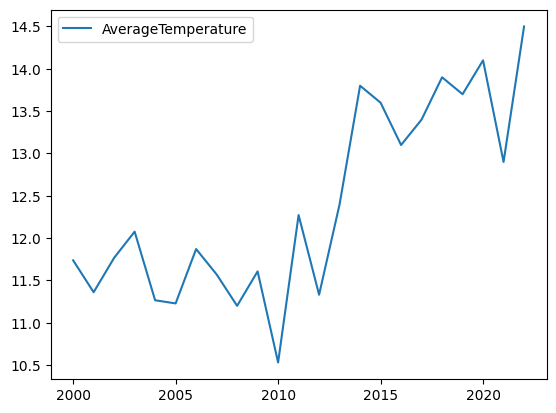

In [26]:
#df_final.plot()
df_final.dtypes
df_final["AverageTemperature"] = df_final["AverageTemperature"].astype("float")
df_final.dtypes
df_final.plot()

<Axes: >

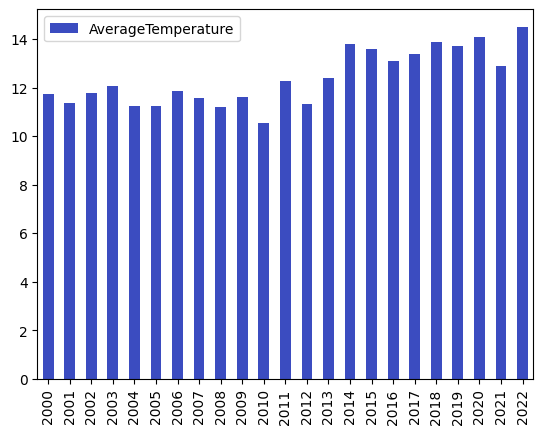

In [27]:
from matplotlib import pyplot as plt
df_final.plot(kind='bar', stacked=True, colormap='coolwarm')

In [28]:
df_final.AverageTemperature.describe()

count    23.000000
mean     12.401170
std       1.142905
min      10.531583
25%      11.466708
50%      12.076917
75%      13.500000
max      14.500000
Name: AverageTemperature, dtype: float64

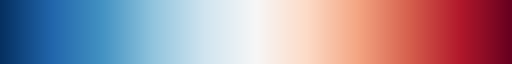

In [29]:
plt.get_cmap('RdBu_r')

7 - affichage du graphique souhaité

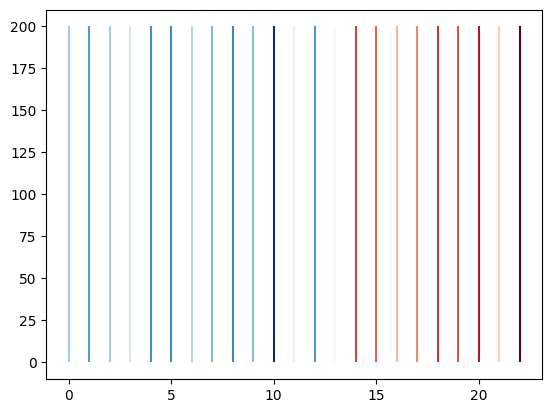

In [30]:
from numpy import interp

cmap = plt.get_cmap('RdBu_r')

min = df_final.AverageTemperature.min()
max = df_final.AverageTemperature.max()
mean = df_final.AverageTemperature.mean()

def getColor(temperature) : 
    return interp(temperature,[min,mean,max],[0,0.5,1])

cpt = 0

for index, row in df_final.iterrows():
    plt.vlines(cpt, 0, 200, color=cmap(getColor(row["AverageTemperature"])))
    cpt+=1

8 - Amélioration du graphique

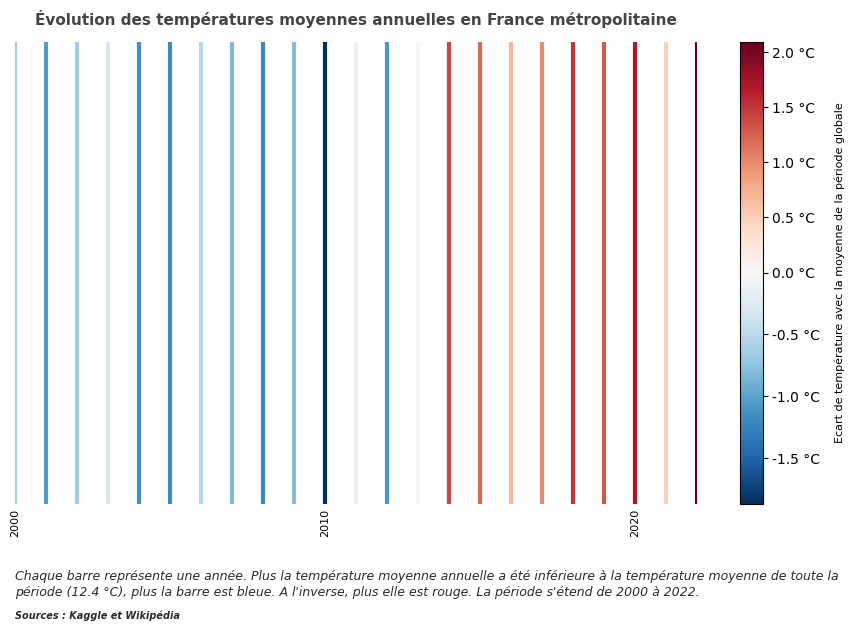

In [31]:
import matplotlib as mpl

#Améliorations :
cpt = 0
height = 600
width = 1100

px = 1/plt.rcParams['figure.dpi']
fig,ax = plt.subplots(figsize=(width*px,height*px))

labels_years = []

for index, row in df_final.iterrows():
    plt.vlines(cpt, 0, height, linewidth=3, color=cmap(getColor(row["AverageTemperature"])))
    cpt+=1
    if (int(row.name)) % 10 ==0:
        labels_years.append(str(row.name))
    else :
        labels_years.append("")

plt.yticks(visible = False)
plt.xticks(range(0,len(labels_years)),labels_years, rotation='vertical', fontsize=8)
plt.box(False)
plt.margins(x=0, y=0)
plt.tick_params(axis='both', length = 0)
plt.title("Évolution des températures moyennes annuelles en France métropolitaine", color="#444444", pad=12, fontsize=11, fontweight="bold")
plt.text(0, -120, "Chaque barre représente une année. Plus la température moyenne annuelle a été inférieure à la température moyenne de toute la\npériode ("+str(round(mean,1))+" °C), plus la barre est bleue. A l'inverse, plus elle est rouge. La période s'étend de 2000 à 2022.", fontsize=9,fontstyle="italic",linespacing=1.3, color="#2b2b2b")
plt.text(0, -150, "Sources : Kaggle et Wikipédia", fontsize=7,fontstyle="italic",color="#2b2b2b", fontweight="bold")

#colorbar
norm = mpl.colors.TwoSlopeNorm(vmin=min-mean,vcenter=0,vmax=max-mean)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax,format="%.1f °C")
cb.set_label(label="Ecart de température avec la moyenne de la période globale",fontsize=8,labelpad=10)

plt.show()

Record in a File

In [32]:
raw_dir_path = weatherManager.data_dir / 'raw'
print(raw_dir_path)

raw_path = str(raw_dir_path / 'raw_data.csv')
df_final = df_final.reset_index()
df_final.to_csv(raw_path, index=False)

NameError: name 'weatherManager' is not defined